In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import datetime as dt
import matplotlib.font_manager as fm

In [5]:
plt.rc('font', family='NanumGothic')
plt.rcParams["font.family"] = 'Nanum Brush Script OTF'

## 데이터 전처리 계획

1. 데이터 타입의 수정

- store_id는 정수가 아니고 오히려 식별자로서 string으로 받는 것이 더 적절할 것으로 예상

- date, time -> 통합 및 datetime으로 데이터 전환

## 목표 정리

### 최종 목표: 상점 매출을 가장 정확하게 예측할 수 있는 ML 모델 예측 + 우승자 코드 분석을 통한 실력 상승


### 1차 목표: 우선 내가 어떤 데이터를 보고 있는지 기본적인 특징 정리 -> EDA

(1) 가장 많이 판매하는 Store id 정리 - unique 값 정리 


(2) 가장 판매가 많이 이루어지는 요일 

(3) 가장 판매가 많이 이루어지는 시간대 산출

(4) 요일 & 시간대에 따른 heatmap을 산출해보자 





In [6]:
df = pd.read_csv('train.csv')

In [7]:
df['datetime'] = df['date'] + ' ' + df['time']

In [8]:
df.datetime = pd.to_datetime(df.datetime)

In [9]:
df.date = pd.to_datetime(df.date)

In [10]:
df.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,datetime
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0,2016-12-14 18:05:31
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0,2016-12-14 18:05:54
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0,2016-12-19 12:42:31
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0,2016-12-19 12:48:08
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0,2016-12-19 13:31:08


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3362796 entries, 0 to 3362795
Data columns (total 9 columns):
store_id        int64
date            datetime64[ns]
time            object
card_id         object
amount          int64
installments    float64
days_of_week    int64
holyday         int64
datetime        datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(4), object(2)
memory usage: 230.9+ MB


In [12]:
df.store_id.nunique()

1775

In [13]:
df.card_id.nunique()

922522

http://www.hanuribiz.com/news/articleView.html?idxno=6935

In [14]:
df.card_id.nunique() / 1.8

512512.2222222222

In [15]:
df2 = df[['store_id', 'amount','installments']]

In [16]:
grp = pd.DataFrame(df2.groupby('store_id')[['installments', 'amount']].sum()).reset_index()

In [17]:
grp.head()

,store_id,installments,amount
0,0,673.0,5234611
1,1,85.0,147950
2,2,0.0,1615060
3,3,2.0,62781
4,4,0.0,270312


In [18]:
grp = grp.sort_values(by = 'amount', ascending = False).reset_index(drop = True)

In [19]:
grp['store_id'] = [str(grp.store_id[i]) for i in range(grp.shape[0])]

In [20]:
test = grp.iloc[:50]

findfont: Font family ['Nanum Brush Script OTF'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Nanum Brush Script OTF'] not found. Falling back to DejaVu Sans.


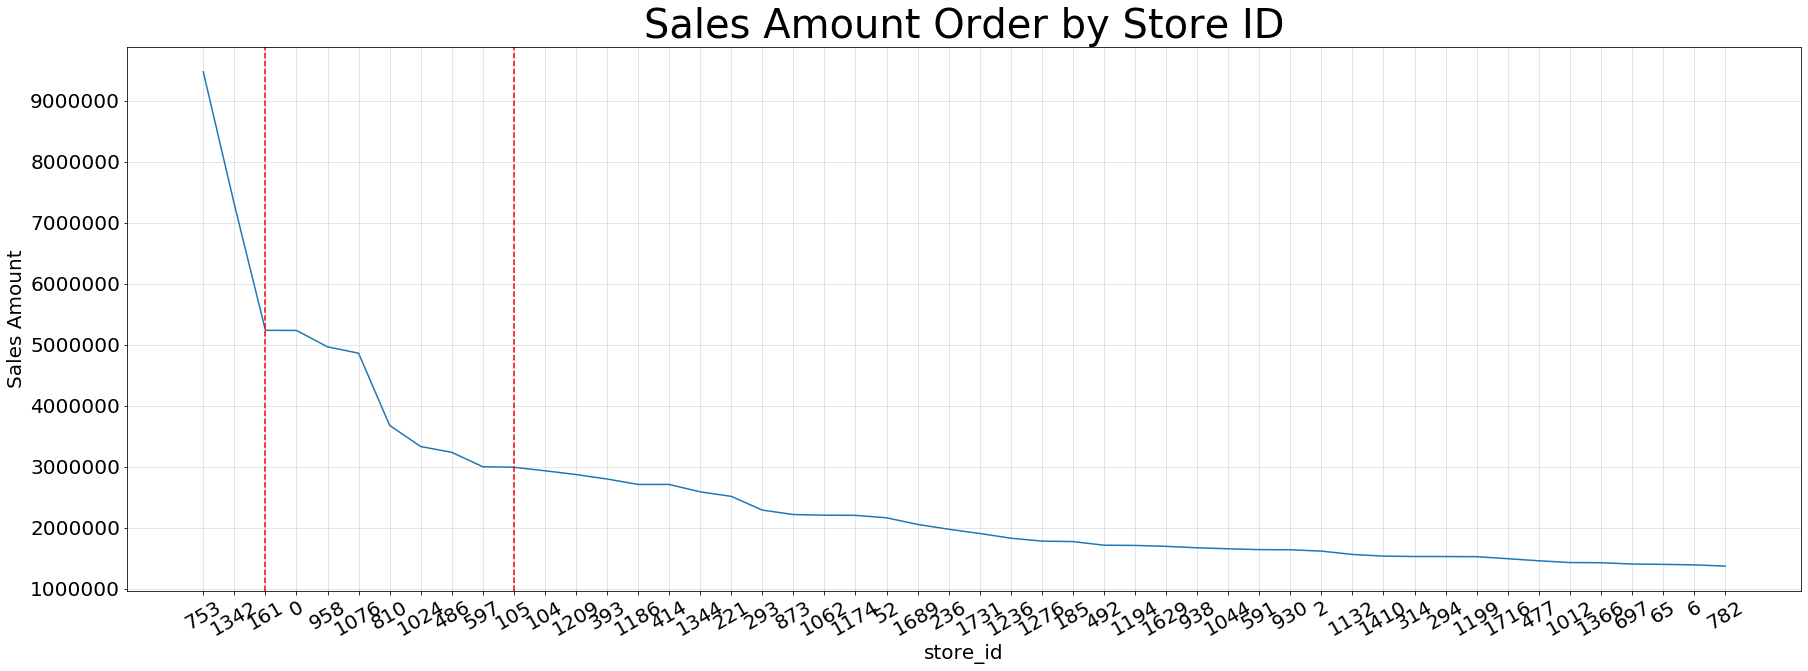

In [21]:
plt.figure(figsize = (30,10))
plt.plot(test.store_id, test.amount)
plt.grid(alpha = 0.4)
plt.title('Sales Amount Order by Store ID', fontsize = 40)
plt.xticks(rotation = 30, fontsize = 20)
plt.xlabel('store_id', fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel('Sales Amount', fontsize = 20)
plt.axvline(x = 2, color = 'r', linestyle = '--')
plt.axvline(x = 10, color = 'r', linestyle = '--');

In [22]:
grp.describe()

,installments,amount
count,1775.000000,1.775000e+03
mean,32.860282,2.765304e+05
std,120.973856,5.318239e+05
min,0.000000,0.000000e+00
25%,0.000000,3.738550e+04
50%,3.000000,1.206910e+05
75%,19.000000,3.074290e+05
max,2516.000000,9.474601e+06


## 가게별 매출 규모 기본 정보 정리

-----------------------------------------------------------------------

## 시계열 데이터로 본 매출 동향 정보

C:\Users\BKPaul\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
findfont: Font family ['Nanum Brush Script OTF'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Nanum Brush Script OTF'] not found. Falling back to DejaVu Sans.


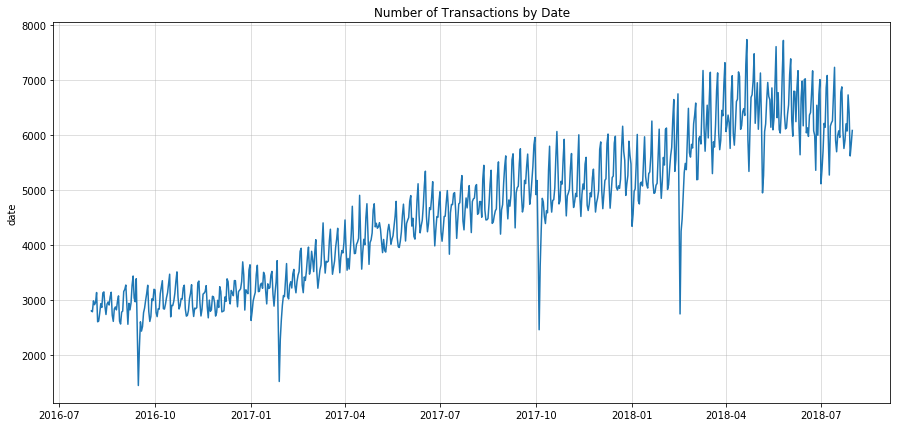

In [23]:
train = pd.read_csv('train.csv')
dates = pd.to_datetime(train.date)
dates = dates.value_counts().sort_index()

plt.figure(figsize=(15,7))
sns.lineplot(x = dates.index, y = dates)
plt.title('Number of Transactions by Date')
plt.grid(alpha = 0.5)
plt.show()

In [25]:
grp2 = pd.DataFrame(df.groupby(df.date)['amount'].sum()).reset_index()

findfont: Font family ['Nanum Brush Script OTF'] not found. Falling back to DejaVu Sans.


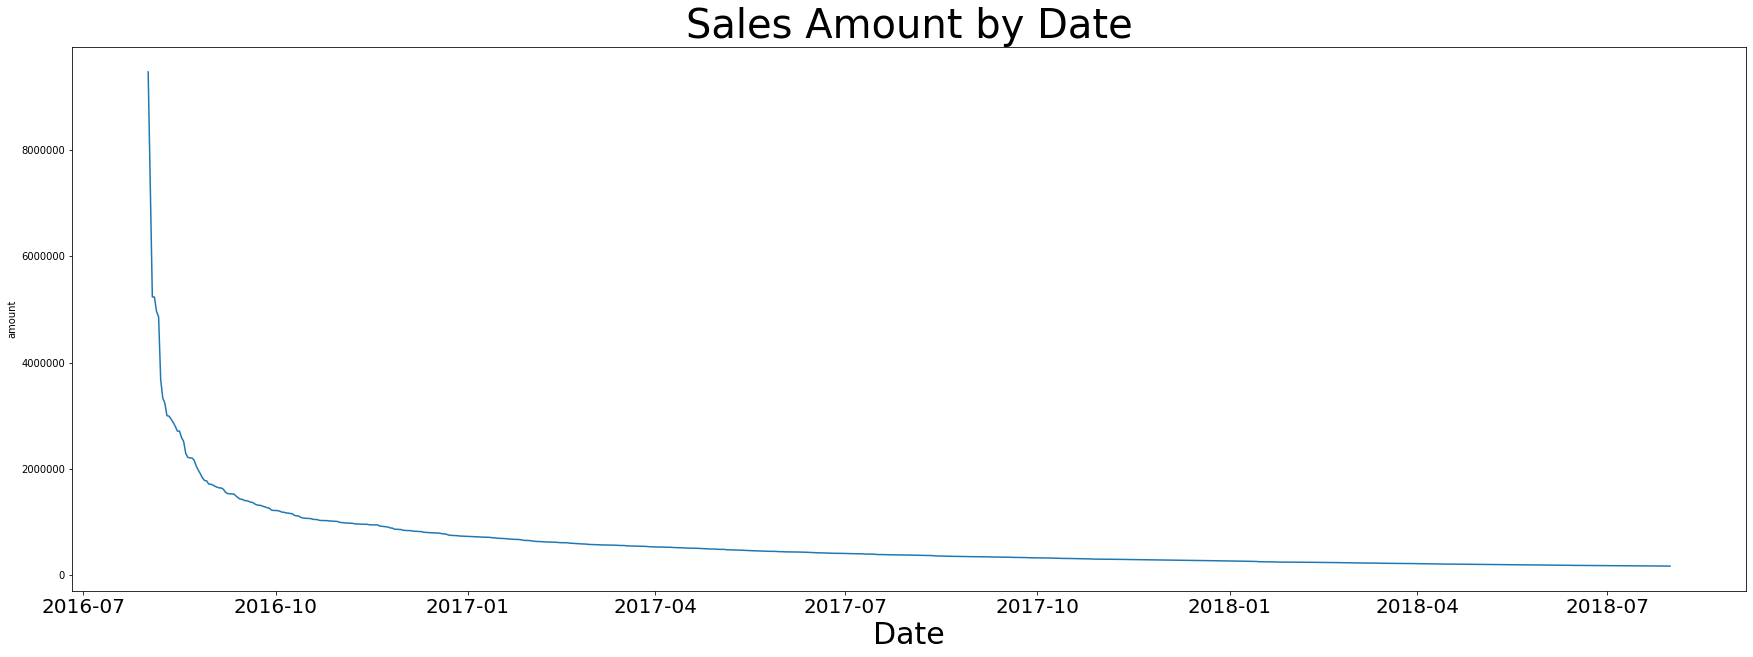

In [26]:
plt.figure(figsize = (30, 10))
sns.lineplot(x = grp2.date, y = grp.amount)
plt.title('Sales Amount by Date', fontsize = 40)
plt.xticks(fontsize = 20)
plt.xlabel('Date', fontsize = 30);

In [27]:
train = pd.read_csv('train.csv')
dates = pd.to_datetime(train.date)

In [28]:
date_df = pd.DataFrame(dates.value_counts()).reset_index()

In [29]:
date_df.columns = ['date', 'counts']
date_df.sort_values(by = 'date', inplace = True)
date_df.reset_index(drop = True, inplace = True)

In [30]:
date_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 2 columns):
date      730 non-null datetime64[ns]
counts    730 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 11.5 KB


In [31]:
grp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 2 columns):
date      730 non-null datetime64[ns]
amount    730 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 11.5 KB


In [32]:
sales_date = pd.merge(grp2, date_df)

In [33]:
sales_date['unit_sales'] = sales_date['amount'] / sales_date['counts']

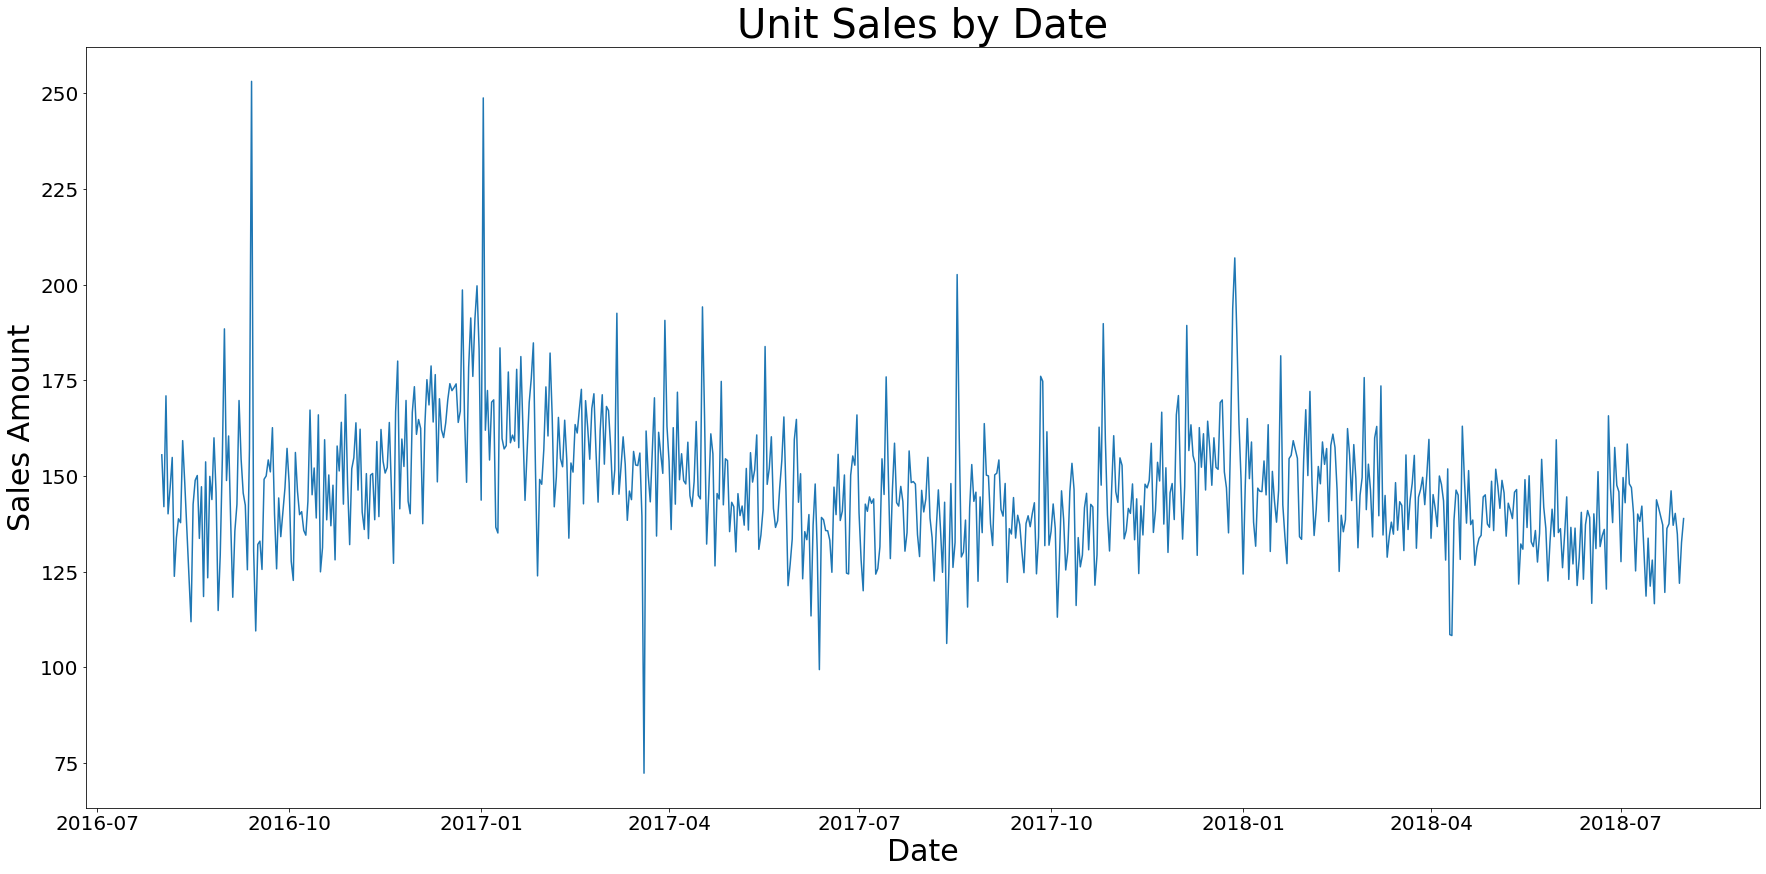

In [34]:
plt.figure(figsize = (30, 14))
sns.lineplot(sales_date.date, sales_date.unit_sales)
plt.title('Unit Sales by Date', fontsize = 40)
plt.xticks(fontsize = 20)
plt.xlabel('Date', fontsize = 30)
plt.yticks(fontsize = 20)
plt.ylabel('Sales Amount', fontsize = 30);

In [35]:
df.iloc[:10].groupby('store_id')['amount'].sum()

store_id
0    787
Name: amount, dtype: int64

In [36]:
df.iloc[:10].amount.sum()

787

--------------------------------------------

In [44]:
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3362796 entries, 0 to 3362795
Data columns (total 8 columns):
store_id        int64
date            object
time            object
card_id         object
amount          int64
installments    float64
days_of_week    int64
holyday         int64
dtypes: float64(1), int64(4), object(3)
memory usage: 205.2+ MB


In [40]:
train.sample(10)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
1865640,945,2017-08-21,21:04:03,a91ad7d45c,140,NaN,0,0
53876,0,2018-03-28,15:11:37,b9806b6832,113,NaN,2,0
1852318,942,2017-10-03,15:17:01,74039442f9,52,NaN,1,1
3029131,1598,2018-01-22,13:06:21,6faa1b0685,80,NaN,0,0
2539890,1342,2017-12-14,20:43:37,ae02cddabf,150,NaN,3,0
2996551,1575,2017-11-04,13:52:20,432f93bfb7,13,NaN,5,0
3357339,1795,2018-04-29,14:08:57,690f2cb8f4,95,NaN,6,0
2674151,1406,2017-09-19,19:31:59,754cf3dd6c,164,NaN,1,0
3119864,1670,2017-10-04,22:02:10,5ffd082c11,90,NaN,2,1
3211375,1714,2018-02-17,15:31:44,6ab177aae9,100,NaN,5,1


In [51]:
from sklearn.model_selection import train_test_split
df2 = df[['store_id', 'datetime', 'date', 'card_id', 'installments', 'days_of_week', 'amount']]

In [52]:
X = df2.iloc[:, :-1]
y = df2.iloc[:, -1]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True)

In [54]:
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate

In [55]:
svm_clf = svm.SVC(kernel = 'linear')

In [56]:
scores = cross_val_score(svm_clf, X, y, cv = 5)

C:\Users\BKPaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\BKPaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: invalid type promotion

  FitFailedWarning)
